variance is: 12.5
expectation is: 25.0


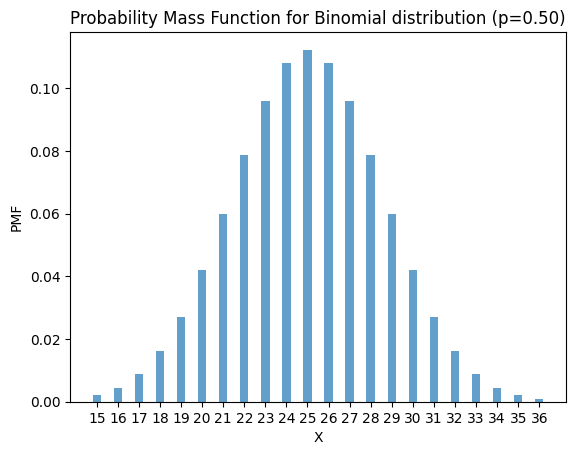

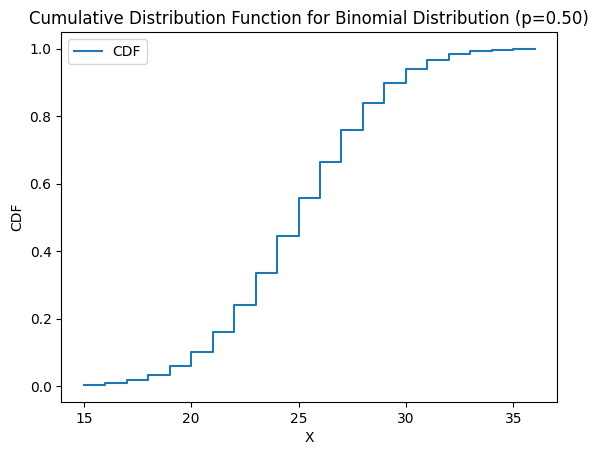

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import comb

#Generate binomial random variables
def generate_binomial(n, p, size):
    random_variables = []  # Initialize an empty list to store generated random variables
    for _ in range(size):  # Loop 'size' times to generate the specified number of random variables
        successes = sum(1 for _ in range(n) if random.random() <= p)  # Count the number of successes in n trials
        random_variables.append(successes)  # Add the number of successes to the list
    return random_variables  # Return the list of generated random variables

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate binomial CDF
def binomial_cdf(k, n, p):
    cdf = 0.0
    for i in range(k + 1):
        cdf += binomial_pmf(i, n, p)
    return cdf

# Function to calculate binomial expectation (mean)
def binomial_expectation(n, p):
    return n * p

# Function to calculate binomial variance
def binomial_variance(n, p):
    return n * p * (1 - p)

#plot pmf
def plot_pmf(n, p, size):
    pmf_values = [binomial_pmf(k, n, p) for k in unique_values]
    plt.bar(unique_values, pmf_values, align='center', alpha=0.7, width=0.4)
    plt.xticks(unique_values)
    plt.xlabel('X')
    plt.ylabel('PMF')
    plt.title(f'Probability Mass Function for Binomial distribution (p={p:.2f})')
    plt.show()

#plot cdf
def plot_cdf(n, p, size):
    y_ecdf = [binomial_cdf(k, n, p) for k in unique_values]
    plt.step(unique_values, y_ecdf, where='post', label='CDF')
    plt.title(f'Cumulative Distribution Function for Binomial Distribution (p={p:.2f})')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()


#set parameters
p = 0.5
n = 50
size = 1000

#store generated binomial random variables
binomial_random_variables = generate_binomial(n, p, size)

#make an array of generated random variables and take unique values
unique_values, counts = np.unique(binomial_random_variables, return_counts=True)


# Print expectation and variance
print("variance is:", binomial_variance(n, p))
print("expectation is:", binomial_expectation(n, p))

#show results
plot_pmf(n, p, size)
plot_cdf(n, p, size)
